<a href="https://colab.research.google.com/github/nravinuthala/EVA4.0/blob/master/Assignment8/S8_Nagaraj_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Changes to be made
1. change the code such that it uses GPU -- Done
2. change the architecture to C1C2C3C40 (basically 3 MPs) -- Done
3. total RF must be more than 44 -- Done
4. one of the layers must use Depthwise Separable Convolution -- Done
5. one of the layers must use Dilated Convolution -- Done
6. use GAP (compulsory):- add FC after GAP to target #of classes (optional) -- Done
7. achieve 80% accuracy, as many epochs as you want. Total Params to be less than 1M. -- Done
8. upload to Github -- Done
9. Attempt S7-Assignment Solution -- Done

In [0]:
from google.colab import drive
import sys
%load_ext autoreload
%autoreload 2
drive.mount('/content/gdrive')
sys.path.append('/content/gdrive/My Drive/libs/EVA4_Assignment7_Libs')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import cifar10_data_provider, resnet, my_trainer, my_tester

In [0]:
train, test, classes = cifar10_data_provider.download_data()
train_loader, test_loader = cifar10_data_provider.get_train_test_loaders(train, test)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


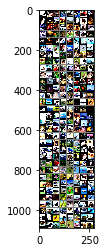

In [0]:
cifar10_data_provider.display(train_loader, classes)

In [0]:
import torch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = resnet.ResNet18().to(device)

cuda


In [0]:
!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [0]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
train_losses = []
test_losses = []
train_acc = []
test_acc = []
model = resnet.ResNet18().to(device)

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=4, gamma=0.1)

EPOCHS = 30

my_trainer.run(model, device, train_loader, test_loader, optimizer, EPOCHS, train_losses, train_acc, test_losses, test_acc)

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.1629947423934937 Batch_id=195 Accuracy=45.97: 100%|██████████| 196/196 [00:26<00:00,  7.33it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0129, Accuracy: 5551/10000 (55.51%)

EPOCH: 1


Loss=0.751429557800293 Batch_id=195 Accuracy=65.04: 100%|██████████| 196/196 [00:26<00:00,  7.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 6541/10000 (65.41%)

EPOCH: 2


Loss=0.7969210743904114 Batch_id=195 Accuracy=73.61: 100%|██████████| 196/196 [00:26<00:00,  7.39it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 7346/10000 (73.46%)

EPOCH: 3


Loss=0.6135810613632202 Batch_id=195 Accuracy=78.35: 100%|██████████| 196/196 [00:26<00:00,  7.36it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7787/10000 (77.87%)

EPOCH: 4


Loss=0.6910446882247925 Batch_id=195 Accuracy=81.24: 100%|██████████| 196/196 [00:26<00:00,  7.36it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 7621/10000 (76.21%)

EPOCH: 5


Loss=0.6206206679344177 Batch_id=195 Accuracy=83.59: 100%|██████████| 196/196 [00:26<00:00,  7.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 8209/10000 (82.09%)

EPOCH: 6


Loss=0.42663049697875977 Batch_id=195 Accuracy=84.81: 100%|██████████| 196/196 [00:26<00:00,  7.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 8088/10000 (80.88%)

EPOCH: 7


Loss=0.3678528070449829 Batch_id=195 Accuracy=86.35: 100%|██████████| 196/196 [00:26<00:00,  7.42it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 7891/10000 (78.91%)

EPOCH: 8


Loss=0.30943629145622253 Batch_id=195 Accuracy=87.50: 100%|██████████| 196/196 [00:26<00:00,  7.43it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 8264/10000 (82.64%)

EPOCH: 9


Loss=0.2976812422275543 Batch_id=195 Accuracy=88.79: 100%|██████████| 196/196 [00:26<00:00,  7.40it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8460/10000 (84.60%)

EPOCH: 10


Loss=0.27897340059280396 Batch_id=195 Accuracy=89.44: 100%|██████████| 196/196 [00:26<00:00,  7.41it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8540/10000 (85.40%)

EPOCH: 11


Loss=0.38427266478538513 Batch_id=195 Accuracy=90.12: 100%|██████████| 196/196 [00:26<00:00,  7.40it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8501/10000 (85.01%)

EPOCH: 12


Loss=0.3003992438316345 Batch_id=195 Accuracy=90.39: 100%|██████████| 196/196 [00:26<00:00,  7.42it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8545/10000 (85.45%)

EPOCH: 13


Loss=0.33003202080726624 Batch_id=195 Accuracy=91.39: 100%|██████████| 196/196 [00:26<00:00,  7.43it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8693/10000 (86.93%)

EPOCH: 14


Loss=0.33319440484046936 Batch_id=195 Accuracy=91.95: 100%|██████████| 196/196 [00:26<00:00,  7.41it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 8476/10000 (84.76%)

EPOCH: 15


Loss=0.11776129901409149 Batch_id=195 Accuracy=92.50: 100%|██████████| 196/196 [00:26<00:00,  7.42it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8478/10000 (84.78%)

EPOCH: 16


Loss=0.30654817819595337 Batch_id=195 Accuracy=92.87: 100%|██████████| 196/196 [00:26<00:00,  7.42it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8638/10000 (86.38%)

EPOCH: 17


Loss=0.1775960922241211 Batch_id=195 Accuracy=93.04: 100%|██████████| 196/196 [00:26<00:00,  7.41it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8765/10000 (87.65%)

EPOCH: 18


Loss=0.19070181250572205 Batch_id=195 Accuracy=93.64: 100%|██████████| 196/196 [00:26<00:00,  7.43it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8647/10000 (86.47%)

EPOCH: 19


Loss=0.12494295835494995 Batch_id=195 Accuracy=94.26: 100%|██████████| 196/196 [00:26<00:00,  7.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8863/10000 (88.63%)

EPOCH: 20


Loss=0.1920432299375534 Batch_id=195 Accuracy=94.37: 100%|██████████| 196/196 [00:26<00:00,  7.44it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8781/10000 (87.81%)

EPOCH: 21


Loss=0.0777735784649849 Batch_id=195 Accuracy=94.80: 100%|██████████| 196/196 [00:26<00:00,  7.44it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8822/10000 (88.22%)

EPOCH: 22


Loss=0.15957334637641907 Batch_id=195 Accuracy=94.66: 100%|██████████| 196/196 [00:26<00:00,  7.42it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 8658/10000 (86.58%)

EPOCH: 23


Loss=0.1558298021554947 Batch_id=195 Accuracy=95.07: 100%|██████████| 196/196 [00:26<00:00,  7.45it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8806/10000 (88.06%)

EPOCH: 24


Loss=0.12296643108129501 Batch_id=195 Accuracy=95.47: 100%|██████████| 196/196 [00:26<00:00,  7.43it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8880/10000 (88.80%)

EPOCH: 25


Loss=0.12512622773647308 Batch_id=195 Accuracy=95.67: 100%|██████████| 196/196 [00:26<00:00,  7.47it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8925/10000 (89.25%)

EPOCH: 26


Loss=0.07161136716604233 Batch_id=195 Accuracy=95.77: 100%|██████████| 196/196 [00:26<00:00,  7.45it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8916/10000 (89.16%)

EPOCH: 27


Loss=0.06408374756574631 Batch_id=195 Accuracy=96.26: 100%|██████████| 196/196 [00:26<00:00,  7.42it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8900/10000 (89.00%)

EPOCH: 28


Loss=0.13052192330360413 Batch_id=195 Accuracy=96.45: 100%|██████████| 196/196 [00:26<00:00,  7.47it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8971/10000 (89.71%)

EPOCH: 29


Loss=0.2721764147281647 Batch_id=195 Accuracy=96.63: 100%|██████████| 196/196 [00:26<00:00,  7.46it/s]



Test set: Average loss: 0.0041, Accuracy: 8934/10000 (89.34%)



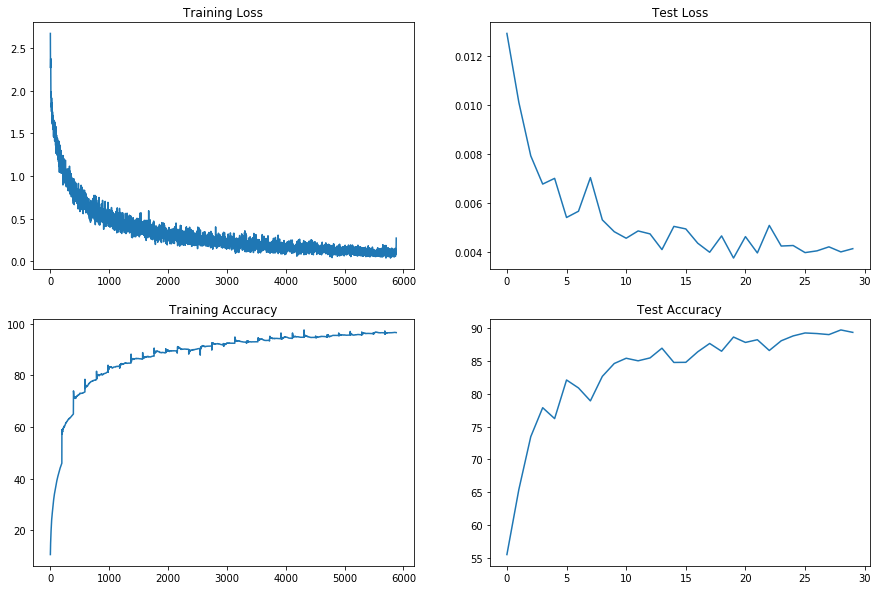

In [0]:
%matplotlib inline
my_trainer.plot(train_losses, train_acc, test_losses, test_acc)